In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
data = pd.read_csv("afg.csv",sep=";")
#print(data.shape)
print(data.shape)
data.head()

(45017, 21)


,OBJECTID,SOURCE,VIL_UID,CENTER,CNTR_CODE,AFG_UID,POPULATION,LANGUAGE_,LANG_CODE,ELEVATION,...,LON_X,MISTI_PROV,MISTI_DIST,VILLAGE_NA,DIST_CODE,DIST_NA_EN,DIST_NA_DA,PROV_NA_EN,PROV_NA_DA,PROV_CODE
0,1,CSO AIMS Villages (ACSOR),QLT-113,NaN,0,ZBL-QLT-113,0,Pashto,2,1716.072021,...,66.71265,ZBL,QLT,Enjergay,2401,Qalat,????,Zabul,????,24
1,2,USAID AIDVillageView,MZI-016,NaN,0,KST-MZI-016,0,Pashto,2,1339.345947,...,69.74210,KST,MZI,Nekbal,2605,Mandozayi,????????,Khost,????,26
2,3,USAID AIDVillageView,MZI-005,NaN,0,KST-MZI-005,0,Pashto,2,1314.277954,...,69.77490,KST,MZI,Bar Khankhel,2605,Mandozayi,????????,Khost,????,26
3,4,USAID AIDVillageView,KJK-011,NaN,0,HLM-KJK-011,0,Pashto,2,1021.958984,...,65.13180,HLM,KJK,Jarya,3210,Kajaki,????,Hilmand,?????,32
4,5,USAID AIDVillageView,BLB-049,NaN,0,FAR-BLB-049,0,Pashto,2,865.890015,...,62.75190,FAR,BLB,Shahrak (2),3103,Balabuluk,???? ????,Farah,????,31


In [3]:
list(data)

['OBJECTID',
 'SOURCE',
 'VIL_UID',
 'CENTER',
 'CNTR_CODE',
 'AFG_UID',
 'POPULATION',
 'LANGUAGE_',
 'LANG_CODE',
 'ELEVATION',
 'LAT_Y',
 'LON_X',
 'MISTI_PROV',
 'MISTI_DIST',
 'VILLAGE_NA',
 'DIST_CODE',
 'DIST_NA_EN',
 'DIST_NA_DA',
 'PROV_NA_EN',
 'PROV_NA_DA',
 'PROV_CODE']

# new column : weigh the longitude and latitude

In [4]:
data["weight_long"]=data.LON_X*data.POPULATION
data["weight_lat"]=data.LAT_Y*data.POPULATION

In [5]:
groups=data.groupby(["PROV_CODE"])
region=pd.DataFrame(columns=['PROV_CODE','POP','LANG_CODE','LON_X','LAT_Y','weight_long','weight_lat'])
i=0
for key,df in groups:
    region.loc[i]=[key,df['POPULATION'].sum(),df["LANG_CODE"].value_counts().idxmax(),df["LON_X"].mean(),df['LAT_Y'].mean(),
                  df['weight_long'].sum()/df['POPULATION'].sum(),df['weight_lat'].sum()/df['POPULATION'].sum()]
    i=i+1

In [6]:
groups=data.groupby(["LANGUAGE_"])
language_spoken=pd.DataFrame(columns=['LANGUAGE_','POP','LANG_CODE','LON_X','LAT_Y','weight_long','weight_lat'])
i=0
for key,df in groups:
    language_spoken.loc[i]=[key,df['POPULATION'].sum(),df["LANG_CODE"].value_counts().idxmax(),df["LON_X"].mean(),df['LAT_Y'].mean(),
                  df['weight_long'].sum()/df['POPULATION'].sum(),df['weight_lat'].sum()/df['POPULATION'].sum()]
    i=i+1

In [7]:
groups=data.groupby(["DIST_CODE"])
district=pd.DataFrame(columns=['DIST_CODE','POP',"Number_centroids","PEOPLE_per_centroids",'LANG_CODE','LON_X','LAT_Y','weight_long','weight_lat'])
i=0
for key,df in groups:
    district.loc[i]=[key,df['POPULATION'].sum(),df['DIST_CODE'].count(),df['POPULATION'].sum()/df["DIST_CODE"].count(),df["LANG_CODE"].value_counts().idxmax(),df["LON_X"].mean(),df['LAT_Y'].mean(),
                  df['weight_long'].sum()/(df['POPULATION'].sum()+1),df['weight_lat'].sum()/(df['POPULATION'].sum()+1)]
    i=i+1

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import shapefile as shp

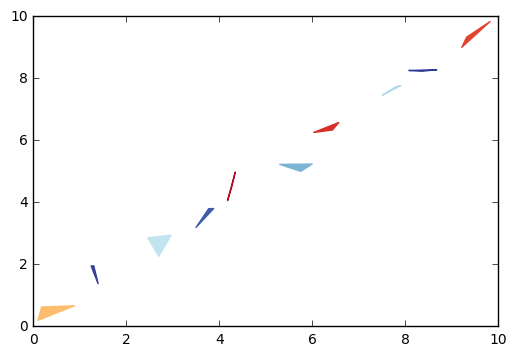

In [9]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

fig,ax = plt.subplots(1)

N = 10
nfloors = np.random.rand(N) # some random data

patches = []

cmap = plt.get_cmap('RdYlBu')
colors = cmap(nfloors) # convert nfloors to colors that we can use later

for i in range(N):
    verts = np.random.rand(3,2)+i # random triangles, plus i to offset them
    polygon = Polygon(verts,closed=True)
    patches.append(polygon)

collection = PatchCollection(patches)

ax.add_collection(collection)

collection.set_color(colors)

ax.autoscale_view()
plt.show()

In [10]:
def f(data):
    if data['POPULATION']>1000000:
        val = data['POPULATION']/1000
    elif data['POPULATION'] > 100000:
        val = data['POPULATION']/700
    elif data['POPULATION'] > 10000:
        val = data['POPULATION']/300
    elif data['POPULATION'] > 1000:
        val = data['POPULATION']/80
    elif data['POPULATION'] > 100:
        val = data['POPULATION']/90
    elif data['POPULATION'] > 10:
        val = data['POPULATION']/9.99
    else:
        val = 1
    return val

data["weight_pop"]=data.apply(f, axis=1)

In [11]:
def g(data):
    if data['POPULATION']>1000000:
        val = "#b8860b"
    elif data['POPULATION'] > 100000:
        val = "#ffd700"
    elif data['POPULATION'] > 10000:
        val = "#eedd82"
    elif data['POPULATION'] > 1000:
        val = "#eee8aa"
    elif data['POPULATION'] > 100:
        val = "#ffffe0"
    elif data['POPULATION'] > 10:
        val = "#ffffe0"
    else:
        val = "green"
    return val

data["weight_pop_col"]=data.apply(g, axis=1)

C:\Users\alexis\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


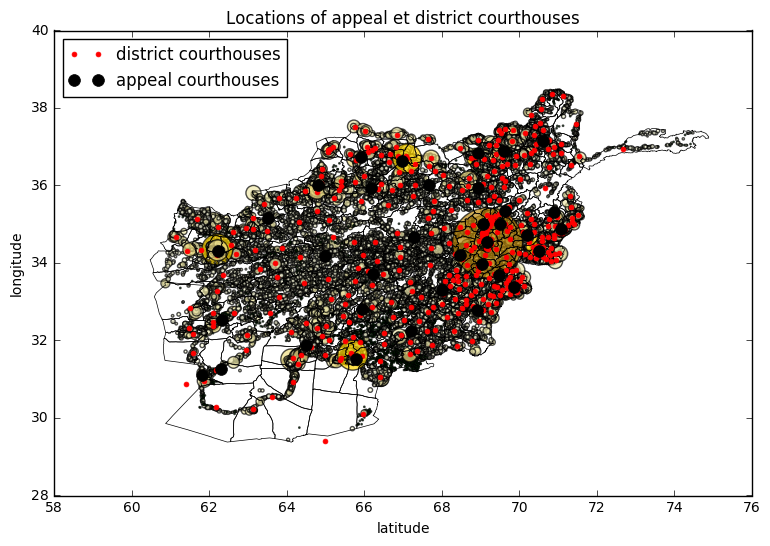

In [13]:
sf = shp.Reader("Afghanistan_Districts","rb")

district=district[district['weight_lat']>0]
region=region[district['weight_lat']>0]

plt.figure()
plt.figure(figsize=(9,6))


for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,color='k',linewidth=0.5)


#plt.plot(data['LON_X'],data['LAT_Y'],alpha=0.7)
plt.scatter(data['LON_X'],data['LAT_Y'],s=data["weight_pop"],c=data["weight_pop_col"],label="",alpha=0.7)    
plt.plot(district['weight_long'], district['weight_lat'],".r",label='district courthouses',ms=7)
plt.plot(region['weight_long'], region['weight_lat'],".k",label='appeal courthouses',ms=17)
plt.title("Locations of appeal et district courthouses")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend(loc='best')
plt.show()

C:\Users\alexis\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


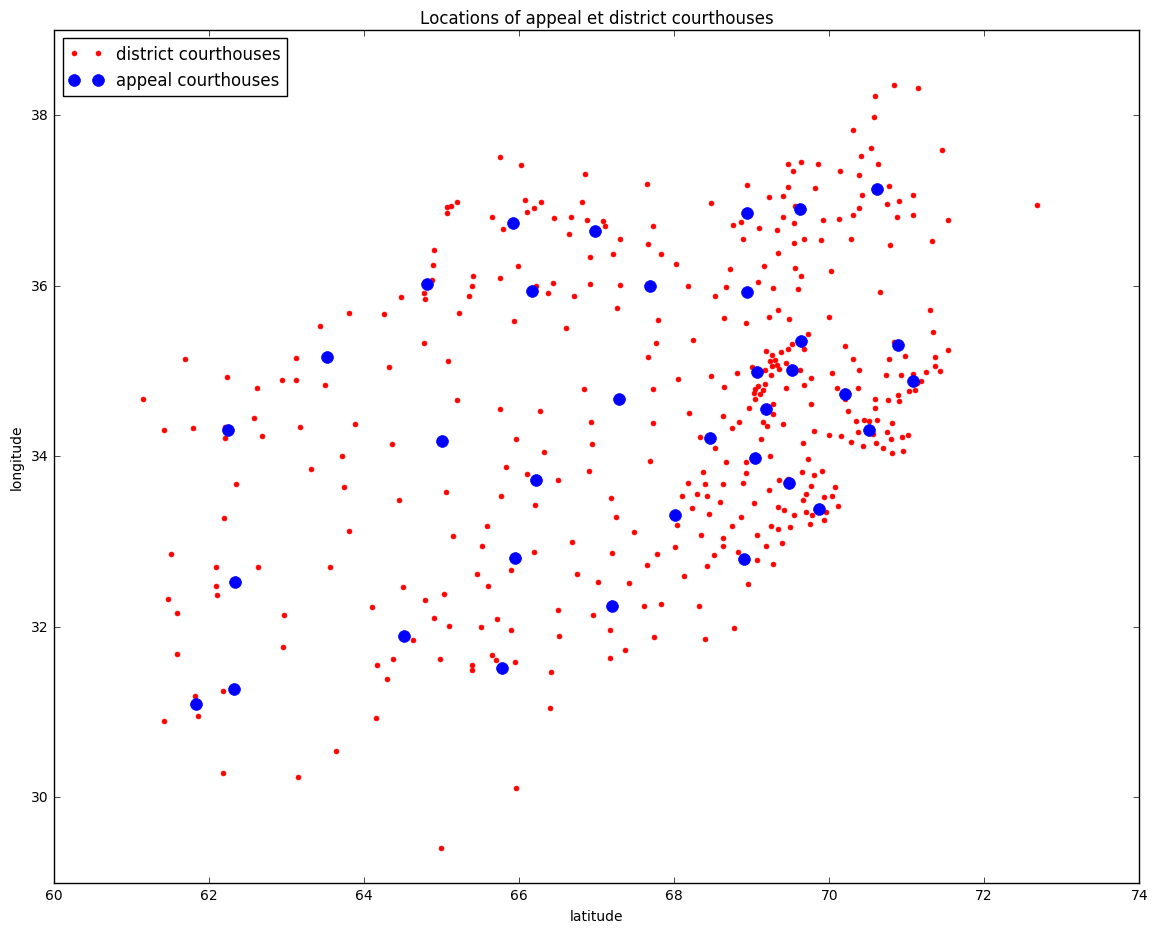

In [14]:
district=district[district['weight_lat']>0]
region=region[district['weight_lat']>0]

fig = plt.figure(figsize=(14,11))
plt.plot(district['weight_long'], district['weight_lat'],".r",label='district courthouses',ms=7)
plt.plot(region['weight_long'], region['weight_lat'],".b",label='appeal courthouses',ms=17)
plt.title("Locations of appeal et district courthouses")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend(loc='best')
plt.show()

In [15]:
district.head(7)

,DIST_CODE,POP,Number_centroids,PEOPLE_per_centroids,LANG_CODE,LON_X,LAT_Y,weight_long,weight_lat
0,0.0,149.0,1.0,149.000000,5.0,61.823600,31.096900,61.411443,30.889587
1,101.0,2539972.0,114.0,22280.456140,1.0,69.139068,34.513146,69.180955,34.522826
2,102.0,58612.0,55.0,1065.672727,2.0,69.299699,34.659772,69.267976,34.611314
3,103.0,81807.0,106.0,771.764151,1.0,69.039113,34.667906,69.042046,34.675852
4,104.0,120978.0,132.0,916.500000,2.0,68.962534,34.545455,68.963485,34.560607
5,105.0,33101.0,73.0,453.438356,2.0,69.100419,34.392225,69.140783,34.399366
6,106.0,18235.0,49.0,372.142857,2.0,69.207871,34.357373,69.193752,34.352019


In [16]:
district[district["DIST_CODE"]==3402.0]

,DIST_CODE,POP,Number_centroids,PEOPLE_per_centroids,LANG_CODE,LON_X,LAT_Y,weight_long,weight_lat
396,3402.0,21031.0,150.0,140.206667,5.0,61.851853,31.153229,61.820974,31.189082


### if there are less than X inhabitants in the centroids of this district (the X should depend on the district we are talking about), then, locates the centroids that has more than Y inhabitants which is close (fix a threshold thanks to the longitude and the latitude of the 2 centroids we are talking about), then merge the 2 centroids.

# data grouping centroids

In [17]:
data[data["DIST_CODE"]==1001]["DIST_CODE"].count()

175

# aggregating small centroids to bigger

In [18]:
data_big=data[data["POPULATION"]>99999]

In [19]:
data_big.iloc[3][1]

'Yale POP_MASTER'

In [20]:
def find_city(longitude, latitude, big_town):
    closest = 0
    centroid = big_town[["LON_X","LAT_Y"]].iloc[0]
    min_dis = (longitude - centroid[0])**2 + (latitude - centroid[1])**2 
    for i in range(1, big_town[["LON_X","LAT_Y"]].shape[0]):
        dis = (longitude - big_town[["LON_X","LAT_Y"]].iloc[i][0])**2 + (latitude - big_town[["LON_X","LAT_Y"]].iloc[i][1])**2 
        if dis < min_dis:
            min_dis = dis
            closest = i
            centroid = big_town[["LON_X","LAT_Y"]].iloc[i]
    return big_town["OBJECTID"].iloc[closest], centroid

#def find_city(longitude, latitude, big_town):
    closest = 0
    centroid = big_town.iloc[0]
    min_dis = (longitude - centroid[0])**2 + (latitude - centroid[1])**2 
    for i in range(1, big_town.shape[0]):
        dis = (longitude - big_town.iloc[i][0])**2 + (latitude - big_town.iloc[i][1])**2 
        if dis < min_dis:
            min_dis = dis
            closest = i
            centroid = big_town.iloc[i]
    return big_town.iloc(closest), centroid

In [21]:
centroid = [0,0]
min_dis = (3 - centroid[0])**2 + (8 - centroid[1])**2

In [22]:
data_big["SOURCE"].iloc[0]

'Yale POP_MASTER'

In [23]:
### try
find_city(61.2716,35.4154,data_big)
#(35 - data_big.iloc[2][[0]])**2 + (66 - data_big.iloc[2][[1]])**2 
#(35-data_big.iloc[2][[0]])[0]
#(35-data_big.iloc[2][[0]])[0]**2+(66 - data_big.iloc[2][[1]])[0]**2 

(43168, LON_X    62.2079
 LAT_Y    34.3458
 Name: 43167, dtype: float64)

In [24]:
data_small=data[data["POPULATION"]<20].head(6)


In [25]:
# itérer par les 399 districts
list_dist=district[district["DIST_CODE"]!=0]["DIST_CODE"].tolist()
list_dist=set(list_dist)
list_dist;

In [26]:
# Find out which small town is close to a given big town 
data_small=data[data["POPULATION"]==0]
data_big=data[data["POPULATION"]>10000]
new_small_data=pd.DataFrame(columns=["OBJECTID","which_big_town"])

k=0
for j in list_dist:
    length=data_small[data_small["DIST_CODE"]==j].shape[0]
    location_data = data_small[data_small["DIST_CODE"]==j][["LON_X","LAT_Y"]].as_matrix()
    #which_centroid = np.zeros(data_small[data_small["DIST_CODE"]==j].shape[0])
    if data_small[(data_small["DIST_CODE"]==j)].shape[0]!=0 and data_big[(data_big["DIST_CODE"]==j)].shape[0]!=0:
        for i in range(0,length):
            town, dummy = find_city(location_data[i][0], location_data[i][1], data_big[data_big["DIST_CODE"]==j])
            #new_small_data.loc[k]=[data_small["OBJECTID"].iloc[i], town]
            new_small_data.loc[k]=[data_small[data_small["DIST_CODE"]==j]["OBJECTID"].iloc[i], town]
            k=k+1
            #which_centroid[i], dummy = find_city(location_data[i][0], location_data[i][1], data_big[data_big["DIST_CODE"]==j][["LON_X","LAT_Y"]])
        #new_small_data[new_small_data]['which_big_town'] = which_centroid    #which town is it linked to

In [27]:
#check the result
print(new_small_data.shape[0],data_small.shape[0])


1754 7460


In [28]:
new_data=pd.merge(new_small_data,data,on="OBJECTID",how="right")[["OBJECTID","which_big_town","POPULATION","LANGUAGE_","LANG_CODE","LON_X","LAT_Y"]]
new_data.head(3)

,OBJECTID,which_big_town,POPULATION,LANGUAGE_,LANG_CODE,LON_X,LAT_Y
0,37052.0,44832.0,0,Dari,1,69.0464,34.5072
1,37053.0,44832.0,0,Dari,1,69.0463,34.5347
2,37054.0,44832.0,0,Dari,1,69.0600,34.5300


In [29]:
#new_data["which_big_town"].fillna(value=0,inplace=True)
new_data

,OBJECTID,which_big_town,POPULATION,LANGUAGE_,LANG_CODE,LON_X,LAT_Y
0,37052.0,44832.0,0,Dari,1,69.04640,34.50720
1,37053.0,44832.0,0,Dari,1,69.04630,34.53470
2,37054.0,44832.0,0,Dari,1,69.06000,34.53000
3,37055.0,44832.0,0,Dari,1,69.05080,34.52910
4,37056.0,44832.0,0,Dari,1,69.03540,34.50110
5,37057.0,44832.0,0,Dari,1,69.05360,34.54770
6,39263.0,44832.0,0,Pashto,2,69.00060,34.47950
7,39264.0,44832.0,0,Pashto,2,69.02650,34.47950
8,39265.0,44832.0,0,Pashto,2,69.01590,34.48470
9,39266.0,44832.0,0,Pashto,2,69.01330,34.47700


###
# nan
#for i in range(new_data.shape[0]):
    #if new_data["which_big_town"].iloc[i]==0:
     #   new_data["which_big_town"].loc[i]=new_data["OBJECTID"].iloc[i]


#def h(data):
    if data['which_big_town']>0:
        val = data['which_big_town']
    else:
        val = data["OBJECTID"]
    return val

new_data["is0?"]=new_data.apply(h,axis=1)

## other technique

In [30]:
new_data["isna"]=new_data["which_big_town"].apply(lambda x : pd.isnull(x))
new_data["which_big_town"].fillna(value=0,inplace=True)
new_data["new_town"]=new_data["isna"]*new_data["OBJECTID"]+new_data["which_big_town"]

In [31]:
new_data.head(2)

,OBJECTID,which_big_town,POPULATION,LANGUAGE_,LANG_CODE,LON_X,LAT_Y,isna,new_town
0,37052.0,44832.0,0,Dari,1,69.0464,34.5072,False,44832.0
1,37053.0,44832.0,0,Dari,1,69.0463,34.5347,False,44832.0


In [32]:
# groupby which_big_town,
# check the language spoken on this big town, add the population, keep the longitude, the latitude
groups=new_data.groupby(["new_town"])
district=pd.DataFrame(columns=["new_town",'POP','LANG_CODE','LON_X','LAT_Y'])
i=0
for key,df in groups:
    district.loc[i]=[key,df['POPULATION'].sum(),df["LANG_CODE"].value_counts().idxmax(),df["LON_X"].mean(),df['LAT_Y'].mean()]
    i=i+1

KeyboardInterrupt: 

In [ ]:
district

# sample to try on AMPL

In [33]:
# sample to try on AMPL
sub_data500 = data[data['POPULATION']>500].sample(frac=0.1, replace=False)
sub_data500_a=sub_data500[["OBJECTID","POPULATION","LANG_CODE","LON_X","LAT_Y"]]
sub_data500_a.count()
sub_data500_a.to_csv("sub_data500.csv")
sub_data500_a.count()

OBJECTID      1248
POPULATION    1248
LANG_CODE     1248
LON_X         1248
LAT_Y         1248
dtype: int64

In [34]:
groups=sub_data500.groupby(["PROV_CODE"])
region500=pd.DataFrame(columns=['PROV_CODE','POP','LANG_CODE','weight_long','weight_lat'])
i=0
for key,df in groups:
    region500.loc[i]=[key,df['POPULATION'].sum(),df["LANG_CODE"].value_counts().idxmax(),df['weight_long'].sum()/df['POPULATION'].sum(),df['weight_lat'].sum()/df['POPULATION'].sum()]
    i=i+1

region500.to_csv("region500.csv")
region500.head()

,PROV_CODE,POP,LANG_CODE,weight_long,weight_lat
0,1.0,170061.0,1.0,69.198016,34.739258
1,2.0,18569.0,1.0,69.464579,35.006505
2,3.0,30698.0,1.0,69.142815,35.019933
3,4.0,27645.0,2.0,68.623905,34.137305
4,5.0,22488.0,2.0,69.058601,34.004859


In [35]:
region500.head(3)

,PROV_CODE,POP,LANG_CODE,weight_long,weight_lat
0,1.0,170061.0,1.0,69.198016,34.739258
1,2.0,18569.0,1.0,69.464579,35.006505
2,3.0,30698.0,1.0,69.142815,35.019933


In [36]:
groups=sub_data500.groupby(["DIST_CODE"])
district500=pd.DataFrame(columns=['DIST_CODE','POP','LANG_CODE','weight_long','weight_lat'])
i=0
for key,df in groups:
    district500.loc[i]=[key,df['POPULATION'].sum(),df["LANG_CODE"].value_counts().idxmax(),df['weight_long'].sum()/(df['POPULATION'].sum()+1),df['weight_lat'].sum()/(df['POPULATION'].sum()+1)]
    i=i+1

district500.to_csv("district500.csv")

In [37]:
district500.head(2)

,DIST_CODE,POP,LANG_CODE,weight_long,weight_lat
0,103.0,4361.0,1.0,69.035995,34.677868
1,104.0,5160.0,1.0,68.984792,34.549651


# ### END of the AMPL sampling

# region

In [38]:
data["PROV_CODE"].describe()

count    45017.000000
mean        18.224959
std          9.721452
min          0.000000
25%         10.000000
50%         18.000000
75%         27.000000
max         34.000000
Name: PROV_CODE, dtype: float64

# district with 0 people --> DIST_CODE=1811

In [39]:
groups=data[data["POPULATION"]>0].groupby(["DIST_CODE"])
district=pd.DataFrame(columns=['DIST_CODE','POP','LANG_CODE','LON_X','LAT_Y','weight_long','weight_lat'])
i=0
for key,df in groups:
    district.loc[i]=[key,df['POPULATION'].sum(),df["LANG_CODE"].value_counts().idxmax(),df["LON_X"].mean(),df['LAT_Y'].mean(),
                  df['weight_long'].sum()/df['POPULATION'].sum(),df['weight_lat'].sum()/df['POPULATION'].sum()]
    i=i+1

In [40]:
district.count()

DIST_CODE      399
POP            399
LANG_CODE      399
LON_X          399
LAT_Y          399
weight_long    399
weight_lat     399
dtype: int64

In [41]:
#district.to_csv("districts_without_1811.csv")

# new column : scaled population

In [42]:
def f(data):
    if data['POPULATION']>1000000:
        val = data['POPULATION']/1000
    elif data['POPULATION'] > 100000:
        val = data['POPULATION']/700
    elif data['POPULATION'] > 10000:
        val = data['POPULATION']/300
    elif data['POPULATION'] > 1000:
        val = data['POPULATION']/80
    elif data['POPULATION'] > 100:
        val = data['POPULATION']/90
    elif data['POPULATION'] > 10:
        val = data['POPULATION']/9.99
    else:
        val = 1
    return val

data["weight_pop"]=data.apply(f, axis=1)

In [43]:
data["weight_pop"];

In [44]:
#region.to_csv('centroids_project.csv')

## Drop columns with no information

In [45]:
feature_list = ['SOURCE', 'VIL_UID', 'CNTR_CODE', 'AFG_UID', 'POPULATION', 'LANGUAGE_', 'LANG_CODE', 'ELEVATION',
 'LAT_Y', 'LON_X', 'MISTI_PROV', 'MISTI_DIST', 'VILLAGE_NA', 'DIST_CODE', 'DIST_NA_EN', 'PROV_NA_EN', 'PROV_CODE','weight_pop']

data1 = data[feature_list]
print(data1.shape)
data1.head()

(45017, 18)


,SOURCE,VIL_UID,CNTR_CODE,AFG_UID,POPULATION,LANGUAGE_,LANG_CODE,ELEVATION,LAT_Y,LON_X,MISTI_PROV,MISTI_DIST,VILLAGE_NA,DIST_CODE,DIST_NA_EN,PROV_NA_EN,PROV_CODE,weight_pop
0,CSO AIMS Villages (ACSOR),QLT-113,0,ZBL-QLT-113,0,Pashto,2,1716.072021,32.25638,66.71265,ZBL,QLT,Enjergay,2401,Qalat,Zabul,24,1.0
1,USAID AIDVillageView,MZI-016,0,KST-MZI-016,0,Pashto,2,1339.345947,33.31750,69.74210,KST,MZI,Nekbal,2605,Mandozayi,Khost,26,1.0
2,USAID AIDVillageView,MZI-005,0,KST-MZI-005,0,Pashto,2,1314.277954,33.30110,69.77490,KST,MZI,Bar Khankhel,2605,Mandozayi,Khost,26,1.0
3,USAID AIDVillageView,KJK-011,0,HLM-KJK-011,0,Pashto,2,1021.958984,32.38220,65.13180,HLM,KJK,Jarya,3210,Kajaki,Hilmand,32,1.0
4,USAID AIDVillageView,BLB-049,0,FAR-BLB-049,0,Pashto,2,865.890015,32.58320,62.75190,FAR,BLB,Shahrak (2),3103,Balabuluk,Farah,31,1.0


In [46]:
data1.groupby("LANGUAGE_").size().sort_values(ascending=False)

LANGUAGE_
Dari         20866
Pashto       19047
Uzbek         2188
Other          703
Balochi        556
Hazaragi       509
Pashai         499
Turkmen        367
Nuristani      282
dtype: int64

In [47]:
data1.groupby("LANGUAGE_")

## Columns

In [48]:
print(data1["LON_X"].describe())
print("Number of empty cells: ", data1["LON_X"].isnull().sum())

count    45017.000000
mean        67.228758
std          2.497443
min         60.843800
25%         65.623700
50%         67.471450
75%         69.208900
max         74.481400
Name: LON_X, dtype: float64
Number of empty cells:  0


In [49]:
print(data1["LAT_Y"].describe())
print("Number of empty cells: ", data1["LAT_Y"].isnull().sum())

count    45017.000000
mean        34.270806
std          1.610770
min         29.437600
25%         33.207900
50%         34.265970
75%         35.248100
max         38.469800
Name: LAT_Y, dtype: float64
Number of empty cells:  0


latitude in green


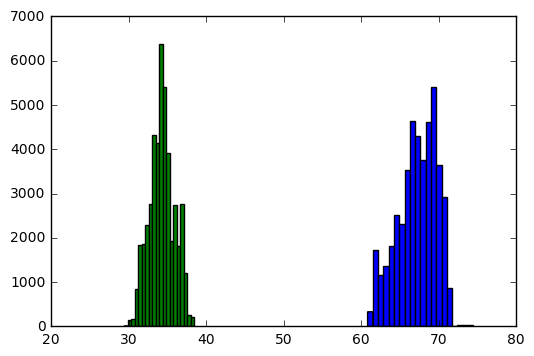

In [50]:
print("latitude in green")
longitude=plt.hist(data1["LON_X"], 20)
latitude=plt.hist(data1["LAT_Y"], 20)
#plt.show()

## Population

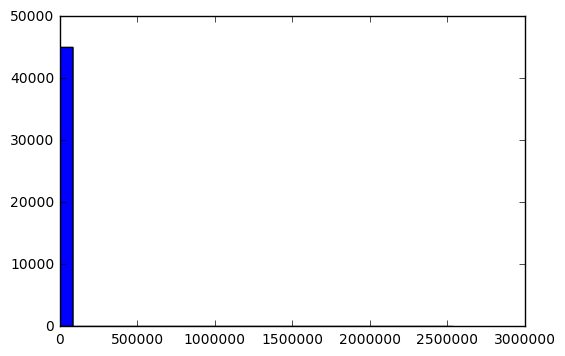

In [51]:
plt.hist(data1["POPULATION"],30)
plt.show()

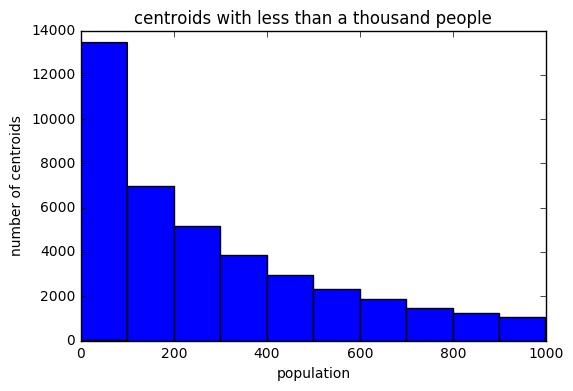

In [52]:
# less than 1000 in the population
data_pop = data1[data1["POPULATION"] < 1000]
plt.hist(data_pop["POPULATION"], 10)
plt.title("centroids with less than a thousand people")
plt.xlabel("population")
plt.ylabel("number of centroids")
plt.show()

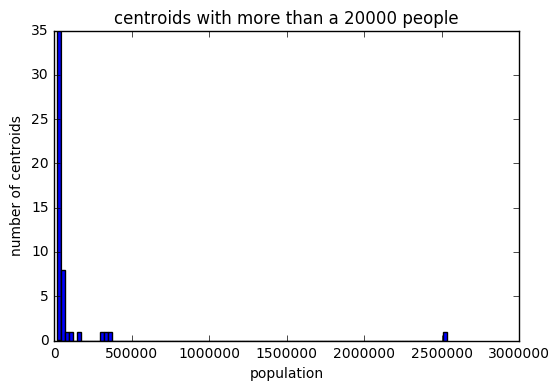

In [53]:
data_pop = data1[data1["POPULATION"] > 20000]
plt.hist(data_pop["POPULATION"], 100)
plt.title("centroids with more than a 20000 people")
plt.xlabel("population")
plt.ylabel("number of centroids")
plt.show()

In [54]:
print(data1["POPULATION"].describe())

count    4.501700e+04
mean     5.559597e+02
std      1.236399e+04
min      0.000000e+00
25%      7.100000e+01
50%      2.360000e+02
75%      5.500000e+02
max      2.536300e+06
Name: POPULATION, dtype: float64


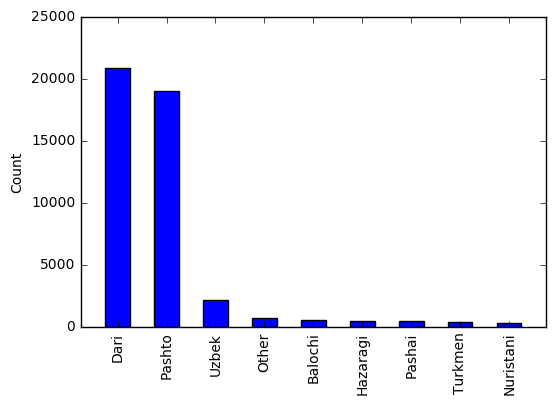

In [55]:
group = data1.groupby(["LANGUAGE_"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

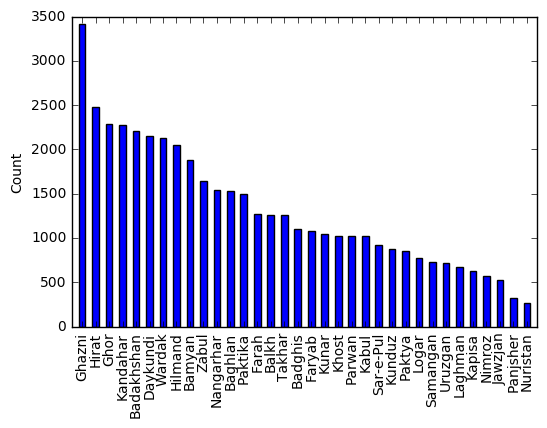

In [56]:
group = data1.groupby(["PROV_NA_EN"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## locations of centroids

In [57]:
from matplotlib import pyplot as plt
%matplotlib inline

# Create a subset for plotting
sub_train = data1.sample(frac=0.2, replace=False)

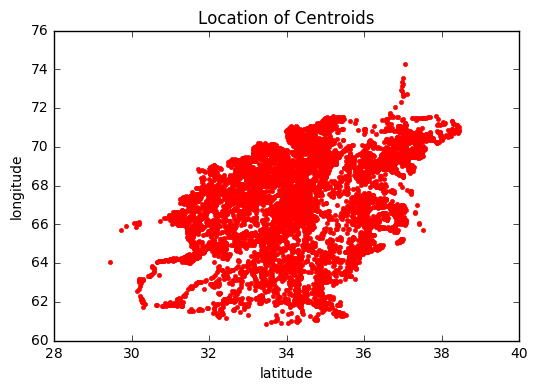

In [58]:
plt.plot(sub_train["LAT_Y"], sub_train["LON_X"],".r")
plt.title("Location of Centroids")
plt.xlabel("latitude")
plt.ylabel("longitude")

## KMEANS

In [59]:
data2=data1[["LON_X","LAT_Y","weight_pop"]]
data2.head()

,LON_X,LAT_Y,weight_pop
0,66.71265,32.25638,1.0
1,69.74210,33.31750,1.0
2,69.77490,33.30110,1.0
3,65.13180,32.38220,1.0
4,62.75190,32.58320,1.0


In [61]:
# We first use k-means clustering to find some centroids
kmeans = KMeans(n_clusters=5, random_state=0).fit(data2[["LON_X","LAT_Y"]])
centroids = kmeans.cluster_centers_
centroids;

In [62]:
c_longitude, c_latitude = np.zeros(5), np.zeros(5)
ptr = 0
for centroid in centroids:
    c_longitude[ptr] = centroid[0]
    c_latitude[ptr] = centroid[1]
    ptr += 1

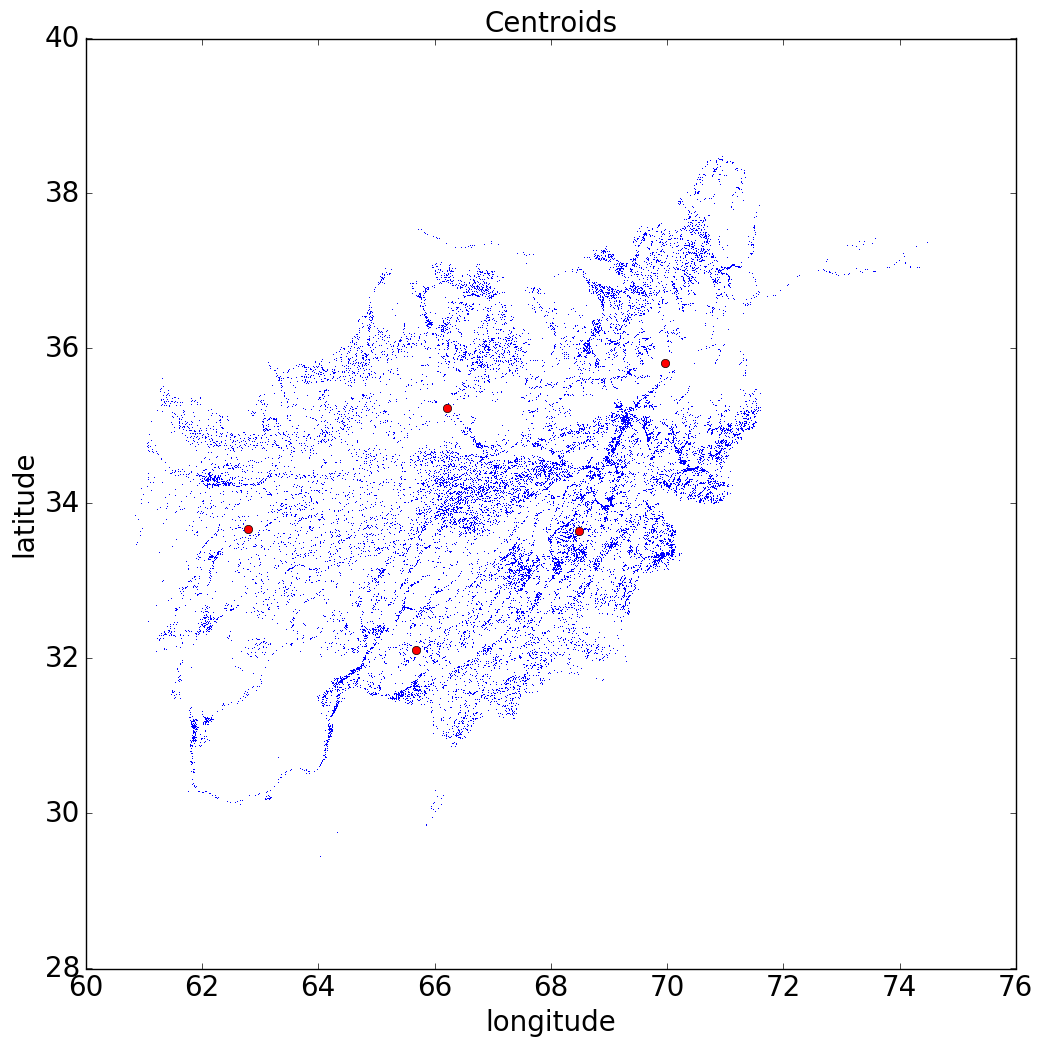

In [63]:
sub_data = data2.sample(frac=0.5, replace=False)
fig = plt.figure(figsize=(12,12))
plt.plot(sub_data['LON_X'], sub_data['LAT_Y'], ",b", alpha=1)
plt.plot(c_longitude, c_latitude, "or")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Centroids', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)

# population map : everything

In [64]:
data = pd.read_csv("afg.csv",sep=";")
data["weight_long"]=data.LON_X*data.POPULATION
data["weight_lat"]=data.LAT_Y*data.POPULATION

In [65]:
def f(data):
    if data['POPULATION']>1000000:
        val = data['POPULATION']/1000
    elif data['POPULATION'] > 100000:
        val = data['POPULATION']/700
    elif data['POPULATION'] > 10000:
        val = data['POPULATION']/300
    elif data['POPULATION'] > 1000:
        val = data['POPULATION']/80
    elif data['POPULATION'] > 100:
        val = data['POPULATION']/90
    elif data['POPULATION'] > 10:
        val = data['POPULATION']/9.99
    else:
        val = 1
    return val

data["weight_pop"]=data.apply(f, axis=1)

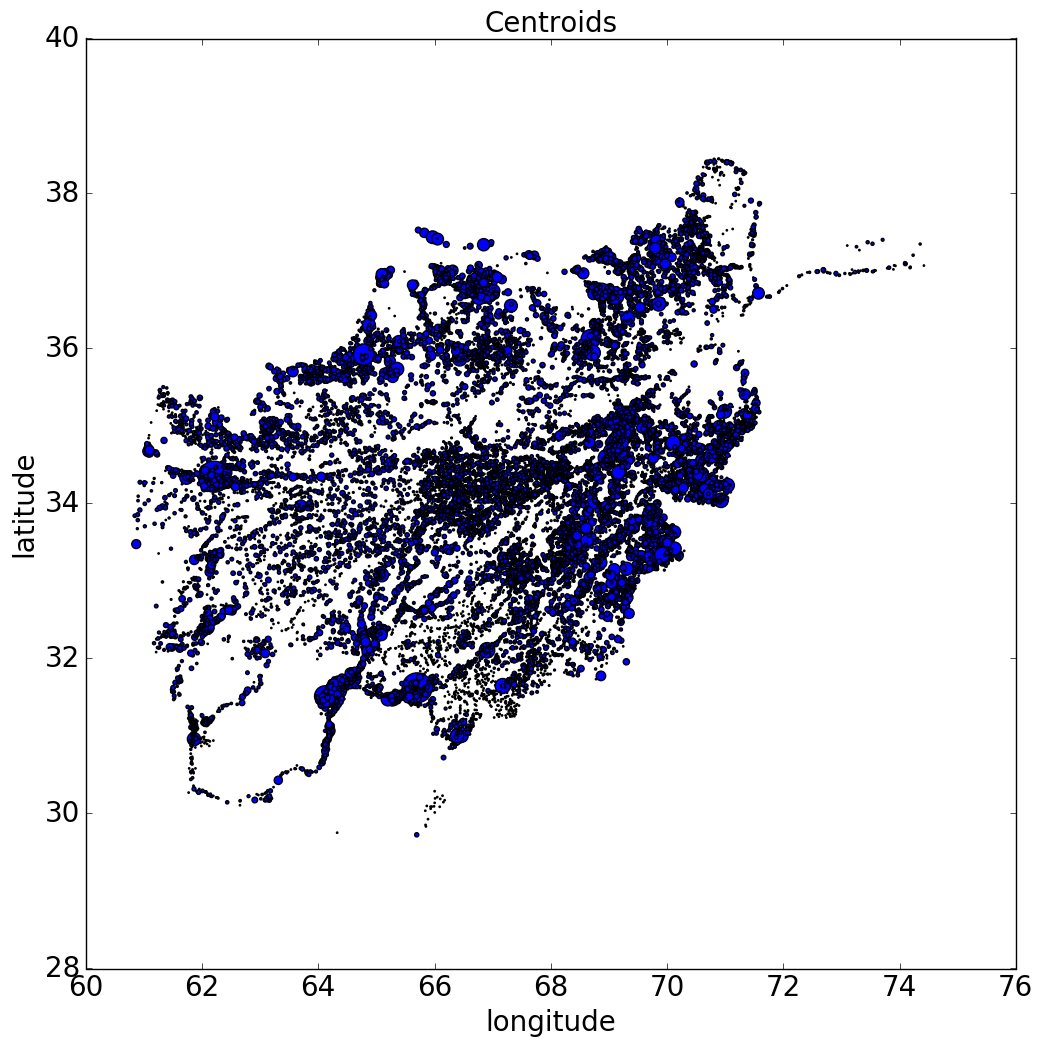

In [66]:
sub_data = data.sample(frac=0.5, replace=False)
fig = plt.figure(figsize=(12,12))
plt.scatter(sub_data['LON_X'], sub_data['LAT_Y'],s=sub_data["weight_pop"])
#plt.plot(c_longitude, c_latitude, "or")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Centroids', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)

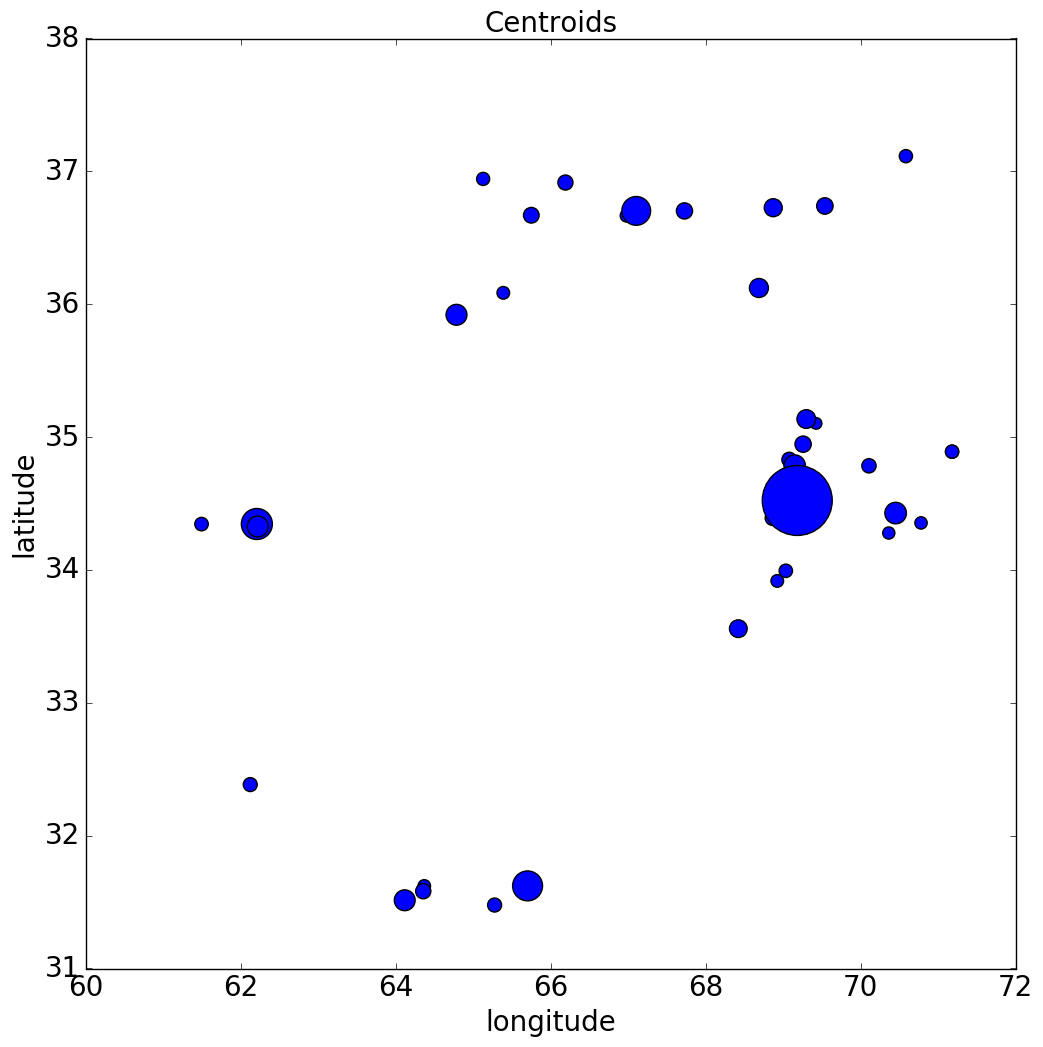

In [67]:
#under 1000
sub_data = data_pop.sample(frac=0.8, replace=False)
fig = plt.figure(figsize=(12,12))
plt.scatter(sub_data['LON_X'], sub_data['LAT_Y'],s=sub_data["weight_pop"])
#plt.plot(c_longitude, c_latitude, "or")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Centroids', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)

In [68]:
data1.head()

,SOURCE,VIL_UID,CNTR_CODE,AFG_UID,POPULATION,LANGUAGE_,LANG_CODE,ELEVATION,LAT_Y,LON_X,MISTI_PROV,MISTI_DIST,VILLAGE_NA,DIST_CODE,DIST_NA_EN,PROV_NA_EN,PROV_CODE,weight_pop
0,CSO AIMS Villages (ACSOR),QLT-113,0,ZBL-QLT-113,0,Pashto,2,1716.072021,32.25638,66.71265,ZBL,QLT,Enjergay,2401,Qalat,Zabul,24,1.0
1,USAID AIDVillageView,MZI-016,0,KST-MZI-016,0,Pashto,2,1339.345947,33.31750,69.74210,KST,MZI,Nekbal,2605,Mandozayi,Khost,26,1.0
2,USAID AIDVillageView,MZI-005,0,KST-MZI-005,0,Pashto,2,1314.277954,33.30110,69.77490,KST,MZI,Bar Khankhel,2605,Mandozayi,Khost,26,1.0
3,USAID AIDVillageView,KJK-011,0,HLM-KJK-011,0,Pashto,2,1021.958984,32.38220,65.13180,HLM,KJK,Jarya,3210,Kajaki,Hilmand,32,1.0
4,USAID AIDVillageView,BLB-049,0,FAR-BLB-049,0,Pashto,2,865.890015,32.58320,62.75190,FAR,BLB,Shahrak (2),3103,Balabuluk,Farah,31,1.0


In [69]:
# ==0
data_pop = data1[data1["POPULATION"] ==0]
language=set(data_pop["LANG_CODE"].tolist())

sub_data = data_pop.sample(frac=0.5, replace=False)

In [70]:
sub_data[sub_data['LANG_CODE']==9].head(2)

,SOURCE,VIL_UID,CNTR_CODE,AFG_UID,POPULATION,LANGUAGE_,LANG_CODE,ELEVATION,LAT_Y,LON_X,MISTI_PROV,MISTI_DIST,VILLAGE_NA,DIST_CODE,DIST_NA_EN,PROV_NA_EN,PROV_CODE,weight_pop
3141,USAID AIDVillageView,MRF-096,0,KND-MRF-096,0,Other,9,2030.593994,31.6209,67.3300,KND,MRF,Ghata Wona,3316,Maruf,Kandahar,33,1.0
5931,USAID AIDVillageView,MRF-100,0,KND-MRF-100,0,Other,9,1839.948975,31.6550,67.1412,KND,MRF,Ghbargay (3),3316,Maruf,Kandahar,33,1.0


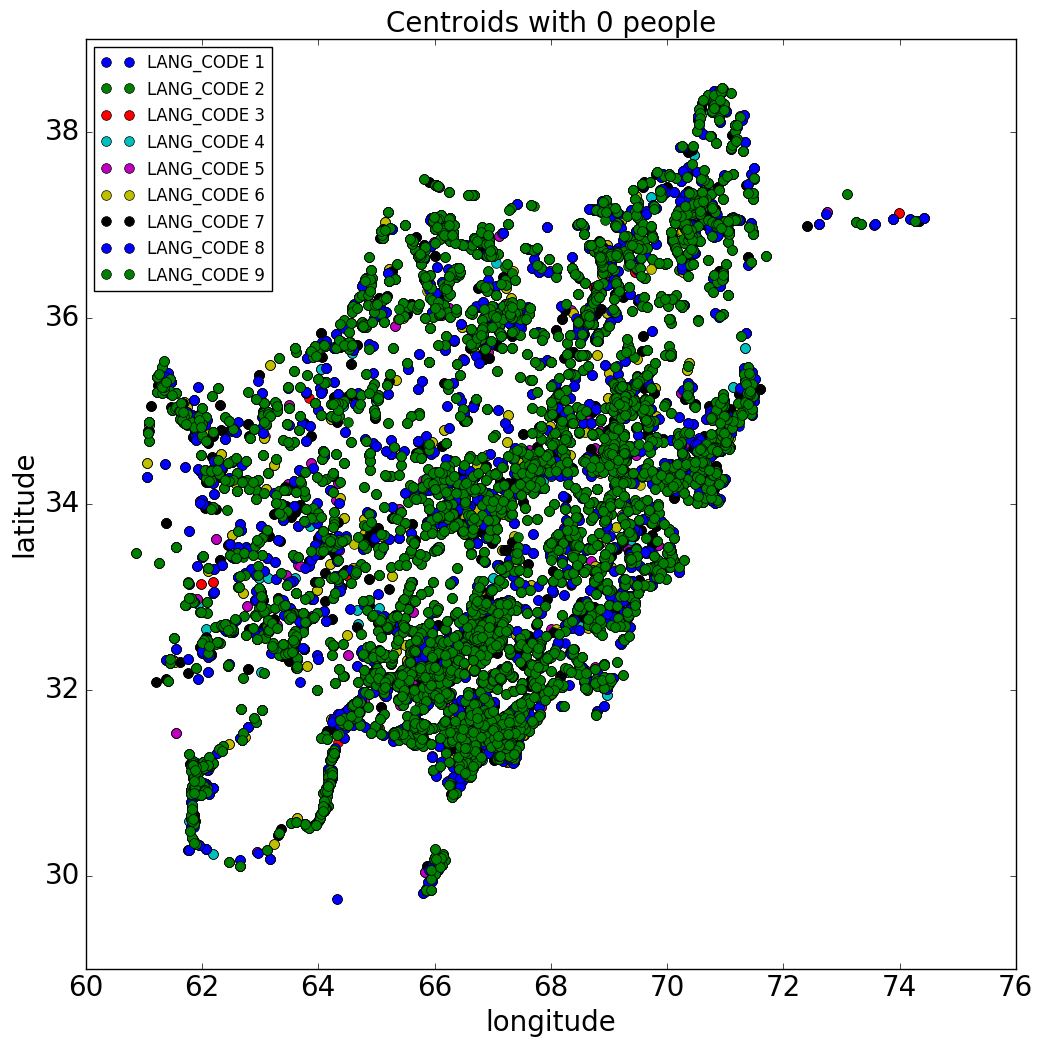

In [71]:

fig = plt.figure(figsize=(12,12))
for i in range(1,10):
    data_pop = data1[data1["POPULATION"] ==0]
    language=set(data_pop["LANG_CODE"].tolist())
    sub_data = data_pop.sample(frac=0.5, replace=False)
    sub_data[sub_data['LANG_CODE']==i]
    plt.plot(sub_data['LON_X'], sub_data['LAT_Y'],"o",label='LANG_CODE {i}'.format(i=i),ms=7)  
    
    
plt.legend(loc='best')
#plt.plot(c_longitude, c_latitude, "or")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(set(sub_data['LANG_CODE'].tolist()))
plt.title('Centroids with 0 people', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)


plt.show()



# more than 1000

In [72]:
sub_data1000 = data[data['POPULATION']>1000].sample(frac=0.8, replace=False)
n_clusters=20
# We first use k-means clustering to find some centroids
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sub_data1000[["LON_X","LAT_Y"]])
centroids = kmeans.cluster_centers_
centroids;

In [73]:
c_longitude, c_latitude = np.zeros(n_clusters), np.zeros(n_clusters)
ptr = 0
for centroid in centroids:
    c_longitude[ptr] = centroid[0]
    c_latitude[ptr] = centroid[1]
    ptr += 1

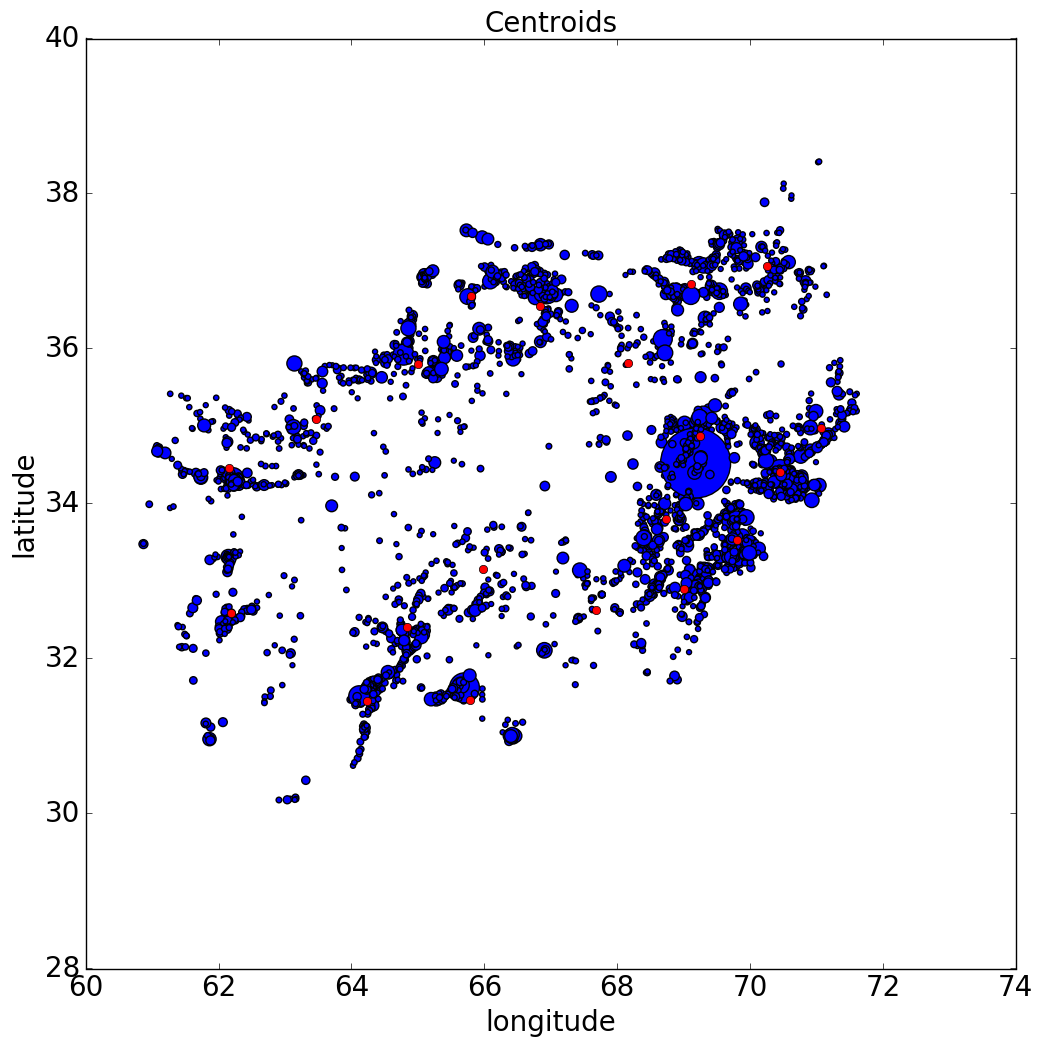

In [74]:
sub_data1000 = data[data['POPULATION']>1000].sample(frac=0.8, replace=False)
fig = plt.figure(figsize=(12,12))
plt.scatter(sub_data1000['LON_X'], sub_data1000['LAT_Y'],s=sub_data1000["weight_pop"])
plt.plot(c_longitude, c_latitude, "or")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Centroids', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)

# population map : more than 20000

In [75]:
sub_data2=data[data["POPULATION"]>19999]

In [76]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(sub_data2[["LON_X","LAT_Y"]])
centroids = kmeans.cluster_centers_
centroids;

In [77]:
c_longitude, c_latitude = np.zeros(3), np.zeros(3)
ptr = 0
for centroid in centroids:
    c_longitude[ptr] = centroid[0]
    c_latitude[ptr] = centroid[1]
    ptr += 1

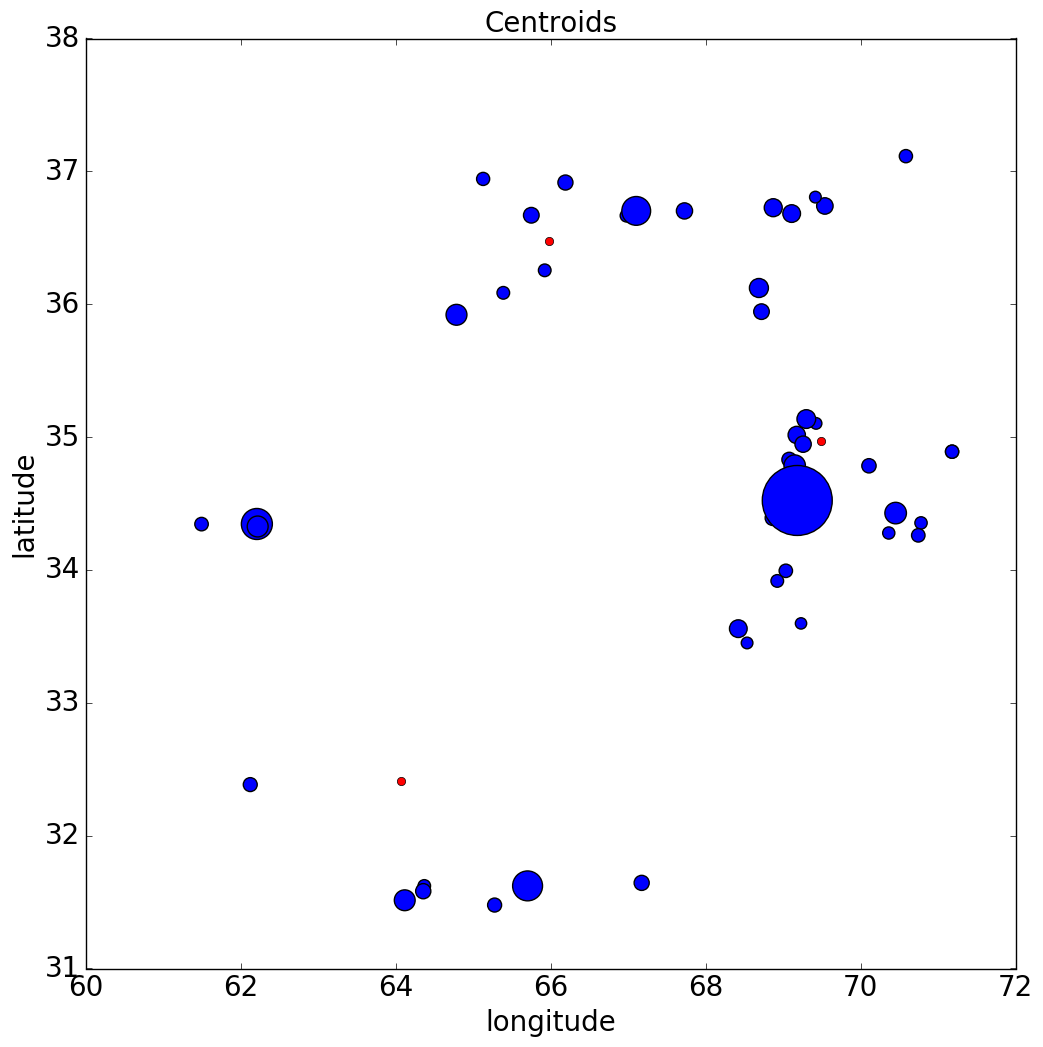

In [78]:

fig = plt.figure(figsize=(12,12))
plt.scatter(sub_data2['LON_X'], sub_data2['LAT_Y'],s=sub_data2["weight_pop"])
plt.plot(c_longitude, c_latitude, "or")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Centroids', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)

In [79]:
def find_ch(longitude, latitude, centroids):
    closest = 0
    centroid = centroids[0]
    min_dis = (longitude - centroid[0])**2 + (latitude - centroid[1])**2 # + (height - centroid[2])**2
    for i in range(1, centroids.shape[0]):
        dis = (longitude - centroids[i][0])**2 + (latitude - centroids[i][1])**2 # + (height - centroid[2])**2
        if dis < min_dis:
            min_dis = dis
            closest = i
            centroid = centroids[i]
    return closest, centroid

In [80]:
i, j = find_ch(2, 2, centroids)
print(i, j)

1 [ 64.06193636  32.41073636]


In [81]:
# Find out which courthouse is close to a given centroid 
location_data = data2.as_matrix()
which_centroid = np.zeros(data.shape[0])
for i in range(0, data.shape[0]):
    which_centroid[i], dummy = find_ch(location_data[i][0], location_data[i][1], centroids)
data2['which_centroid'] = which_centroid

C:\Users\alexis\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


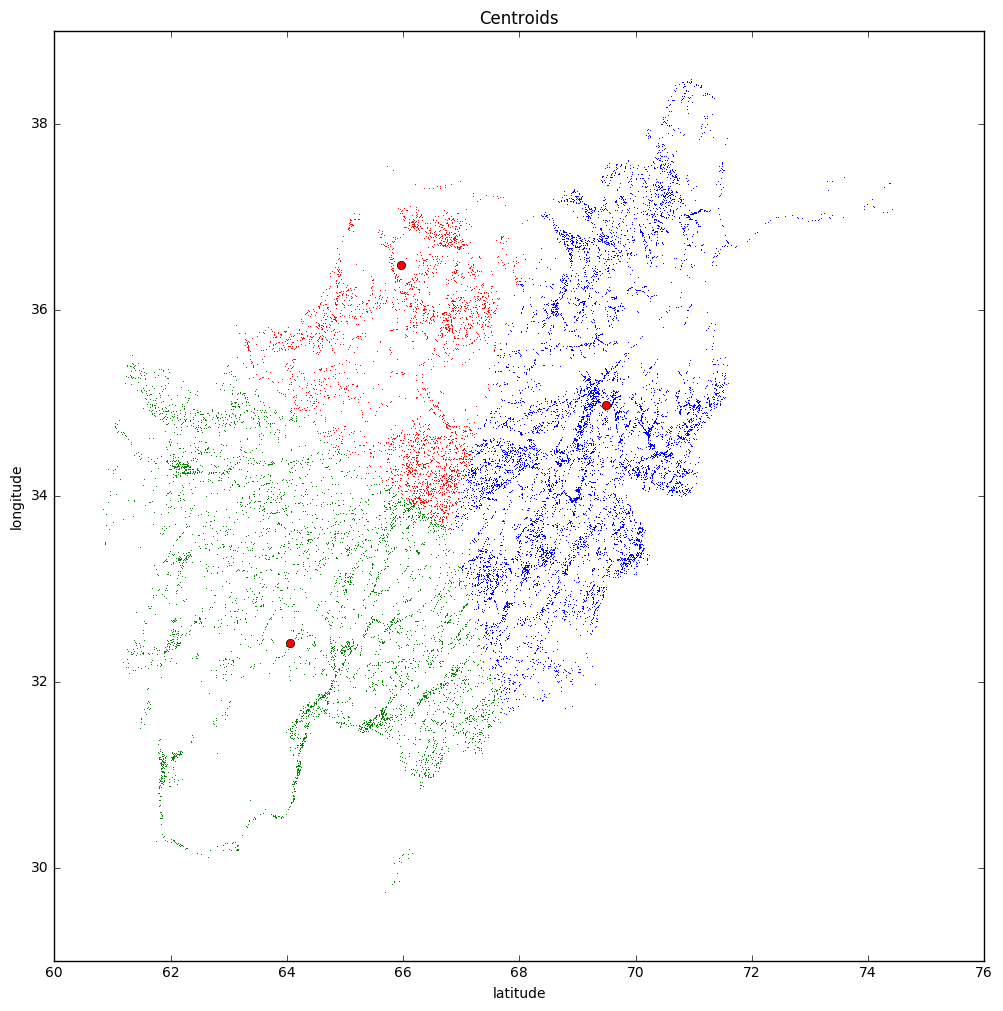

In [82]:
sub_data = data2.sample(frac=0.4, replace=False)
fig = plt.figure(figsize=(12,12))
for i in range(0, 30):
    subsub_data = sub_data[sub_data['which_centroid'] == i]
    plt.plot(subsub_data['LON_X'], subsub_data['LAT_Y'], ",", alpha=10)
plt.plot(c_longitude, c_latitude, "or")
plt.title("Centroids")
plt.xlabel("latitude")
plt.ylabel("longitude")

# weight Kmean

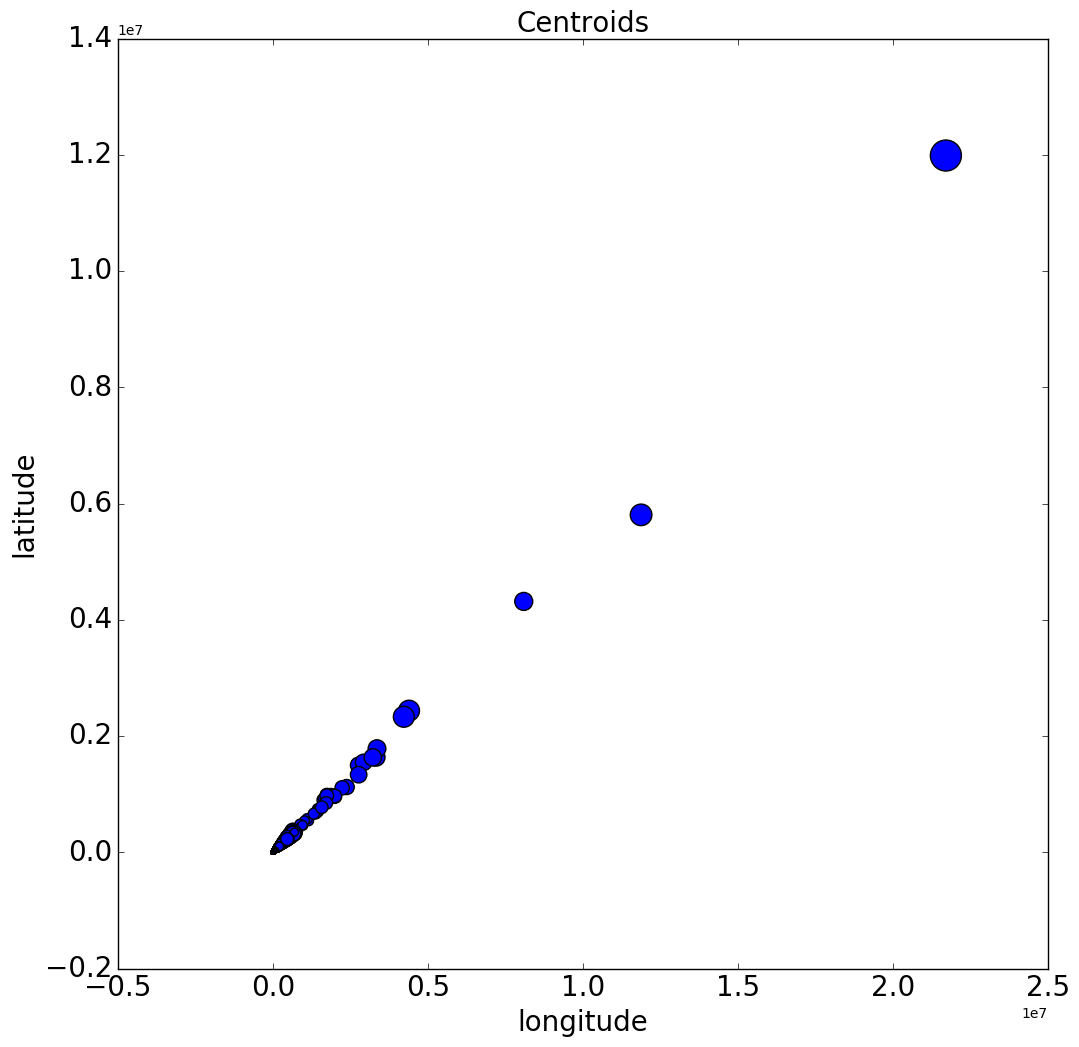

In [83]:
sub_data = data.sample(frac=0.5, replace=False)
fig = plt.figure(figsize=(12,12))
plt.scatter(sub_data['weight_long'], sub_data['weight_lat'],s=sub_data["weight_pop"])
#plt.plot(c_longitude, c_latitude, "or")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Centroids', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)

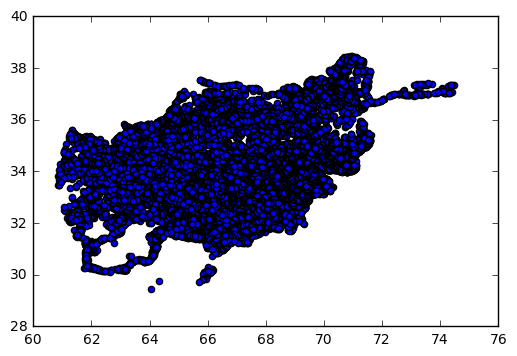

In [84]:
plt.scatter(data["LON_X"],data["LAT_Y"])

In [85]:
data.columns.values.tolist()

['OBJECTID',
 'SOURCE',
 'VIL_UID',
 'CENTER',
 'CNTR_CODE',
 'AFG_UID',
 'POPULATION',
 'LANGUAGE_',
 'LANG_CODE',
 'ELEVATION',
 'LAT_Y',
 'LON_X',
 'MISTI_PROV',
 'MISTI_DIST',
 'VILLAGE_NA',
 'DIST_CODE',
 'DIST_NA_EN',
 'DIST_NA_DA',
 'PROV_NA_EN',
 'PROV_NA_DA',
 'PROV_CODE',
 'weight_long',
 'weight_lat',
 'weight_pop']

In [86]:
data2.head(1)

,LON_X,LAT_Y,weight_pop,which_centroid
0,66.71265,32.25638,1.0,1.0


# FAKE DATA

In [88]:
settlements=pd.read_csv("settlements.csv",sep=";")
settlements

,Settlements,pop,longS,latS
0,1,1,1,1
1,2,1,3,4
2,3,1,5,45
3,4,1,10,50
4,5,1,13,10
5,6,1,16,10
6,7,1,20,45
7,8,1,25,20
8,9,1,20,25
9,10,1,10,20


In [89]:
districts=pd.read_csv("districts.csv",sep=";")
districts


,DistrictCourts,maxPopD,xD,yD
0,1,1000,1,5
1,2,1000,10,45
2,3,1000,13,12
3,4,1000,40,25
4,5,1000,15,20
5,6,1000,45,45


In [90]:
appeals=pd.read_csv("appeals.csv",sep=";")
#appeals=appeals[[0,1,2,3]].dropna()

In [91]:
appeals

,AppealsCourts,maxPopA,xA,yA
0,1,5000,12,4
1,2,5000,30,40
2,3,5000,30,25


# Real data

In [93]:
settlements=pd.read_csv("afg_more_20000.csv",sep=";")
settlements=settlements[["OBJECTID","POPULATION","LON_X","LAT_Y"]]

settlements.head(2)

,OBJECTID,POPULATION,LON_X,LAT_Y
0,1931,67414,64.1159,31.5136
1,4187,30200,62.1227,32.3842


In [94]:
aout=pd.read_csv("AOUT.csv",sep="\t",header=1)
#aout=aout[aout["'A[i,k]'"]==1]

In [95]:
aout.head(3)

,Settlements,AppealsCourts,A
0,1931,0,0
1,1931,1,0
2,1931,2,0


In [96]:
# merge
mergeddf=pd.merge(aout, settlements, left_on = 'Settlements', right_on = 'OBJECTID')

In [97]:
mergeddf[28:34]  #for settlements, row 32 is the appeal

,Settlements,AppealsCourts,A,OBJECTID,POPULATION,LON_X,LAT_Y
28,1931,28,0,1931,67414,64.1159,31.5136
29,1931,29,0,1931,67414,64.1159,31.5136
30,1931,30,0,1931,67414,64.1159,31.5136
31,1931,31,0,1931,67414,64.1159,31.5136
32,1931,32,1,1931,67414,64.1159,31.5136
33,1931,33,0,1931,67414,64.1159,31.5136


In [98]:
#cout=pd.read_csv("COUT.csv",header=1)
cout=pd.read_csv("COUT.csv",sep="\t",header=1)
cout.head(3)

,DistrictCourts,AppealsCourts,C
0,0,0,1
1,0,1,0
2,0,2,0


In [99]:
cout.columns=['DC','AC','Assigned']

In [100]:
cout1=cout[cout["Assigned"]==1]

In [101]:
mergeddf.head(3)

,Settlements,AppealsCourts,A,OBJECTID,POPULATION,LON_X,LAT_Y
0,1931,0,0,1931,67414,64.1159,31.5136
1,1931,1,0,1931,67414,64.1159,31.5136
2,1931,2,0,1931,67414,64.1159,31.5136


dij<=openDj pour tout i,j

input * variables (notation) inline tech to eaqe the notations

distance constraint : set it to 0

locations : distance for each centroid within the region 

"Kabul"

write the different constraints and see where the memory issues

branch and cuts --> gurobi

redefine the variables and Gurobi manual for the branch & bounds and cuts --> variables reduction

realize that : the size of the integer program (no need to include all the constraints). Reduce the number of the constraints and iteratively solve the model. Add constraintes "on the fly"

### Branch and bond to add constraints on the fly ? how to make gurobi do it ?

# dataset with 2 appeal courts

In [102]:
data = pd.read_csv("afg.csv",sep=";")
data["weight_long"]=data.LON_X*data.POPULATION
data["weight_lat"]=data.LAT_Y*data.POPULATION

In [103]:
data=data[(data["PROV_CODE"]==24) | (data["PROV_CODE"]==26)]

In [104]:
feature_list = ['POPULATION','LANG_CODE',
 'LAT_Y', 'LON_X','DIST_CODE', 'PROV_CODE','weight_long','weight_lat',"AFG_UID"]


In [105]:
data=data[feature_list]

In [106]:
data=data[data["POPULATION"]>0]

In [107]:
data.head(10)

,POPULATION,LANG_CODE,LAT_Y,LON_X,DIST_CODE,PROV_CODE,weight_long,weight_lat,AFG_UID
31,733,2,32.08930,66.79675,2401,24,48962.01775,23521.45690,ZBL-QLT-156
32,1029,2,32.11301,66.90993,2401,24,68850.31797,33044.28729,ZBL-QLT-150
34,162,2,32.10196,66.91079,2401,24,10839.54798,5200.51752,ZBL-QLT-153
1376,180,2,33.18105,69.83337,2607,26,12570.00660,5972.58900,KST-GRB-059
1377,249,2,33.13089,69.83012,2607,26,17387.69988,8249.59161,KST-GRB-060
1378,472,2,33.15340,69.82811,2607,26,32958.86792,15648.40480,KST-GRB-062
1379,360,2,33.18155,69.82816,2607,26,25138.13760,11945.35800,KST-GRB-063
1380,1109,2,33.10952,69.85000,2607,26,77463.65000,36718.45768,KST-GRB-064
1381,113,2,33.15309,69.84053,2607,26,7891.97989,3746.29917,KST-GRB-061
1383,62,2,33.22167,69.83201,2606,26,4329.58462,2059.74354,KST-TNI-139


In [108]:
sum(data.POPULATION) 

1066935

In [109]:
groups=data.groupby(["PROV_CODE"])
appeal=pd.DataFrame(columns=['PROV_CODE','POPULATION','LANG_CODE','LON_X','LAT_Y','weight_long','weight_lat'])
i=0
for key,df in groups:
    
    appeal.loc[i]=[key,df['POPULATION'].sum(),df["LANG_CODE"].value_counts().idxmax(),df["LON_X"].mean(),df['LAT_Y'].mean(),
                  df['weight_long'].sum()/df['POPULATION'].sum(),df['weight_lat'].sum()/df['POPULATION'].sum()]
    i=i+1

In [110]:
appeal

,PROV_CODE,POPULATION,LANG_CODE,LON_X,LAT_Y,weight_long,weight_lat
0,24.0,293713.0,2.0,67.191867,32.153243,67.193936,32.244533
1,26.0,773222.0,2.0,69.856771,33.386399,69.862663,33.383658


In [111]:
groups=data.groupby(["DIST_CODE"])
district=pd.DataFrame(columns=['DIST_CODE','POPULATION','LANG_CODE','LON_X','LAT_Y','weight_long','weight_lat',"PROV_CODE"])
i=0
for key,df in groups:
    
    district.loc[i]=[key,df['POPULATION'].sum(),df["LANG_CODE"].value_counts().idxmax(),df["LON_X"].mean(),df['LAT_Y'].mean(),
                  df['weight_long'].sum()/df['POPULATION'].sum(),df['weight_lat'].sum()/df['POPULATION'].sum(),df["PROV_CODE"].mean()]
    i=i+1

In [112]:
district

,DIST_CODE,POPULATION,LANG_CODE,LON_X,LAT_Y,weight_long,weight_lat,PROV_CODE
0,2401.0,41500.0,2.0,66.963360,32.152075,66.952439,32.141626,24.0
1,2402.0,9560.0,2.0,67.070241,32.543359,67.022757,32.526197,24.0
2,2403.0,21249.0,2.0,66.513891,32.230254,66.500714,32.203684,24.0
3,2404.0,18856.0,2.0,66.508447,31.885523,66.514214,31.898541,24.0
4,2405.0,30332.0,9.0,67.121831,31.953785,67.178761,31.966084,24.0
5,2406.0,67290.0,2.0,67.414742,32.512257,67.423314,32.516611,24.0
6,2407.0,21742.0,2.0,67.228437,32.857609,67.200986,32.867155,24.0
7,2408.0,12431.0,2.0,66.751035,32.626548,66.753582,32.617113,24.0
8,2409.0,15598.0,2.0,67.389425,31.728600,67.367524,31.726800,24.0
9,2410.0,30388.0,2.0,67.735351,31.867954,67.738349,31.882700,24.0


## information we want :

In [113]:
settlements24_26=data[['POPULATION','LANG_CODE',
 'LAT_Y', 'LON_X','DIST_CODE', 'PROV_CODE',"AFG_UID"]]

In [114]:
appeal24_26=appeal[['POPULATION','LANG_CODE',"weight_lat","weight_long",'PROV_CODE']]

In [115]:
appeal24_26

,POPULATION,LANG_CODE,weight_lat,weight_long,PROV_CODE
0,293713.0,2.0,32.244533,67.193936,24.0
1,773222.0,2.0,33.383658,69.862663,26.0


In [116]:
district24_26=district[['POPULATION','LANG_CODE',"weight_lat","weight_long",'PROV_CODE',"DIST_CODE"]]

In [117]:
district24_26;

In [118]:
#district24_26.to_csv("district24_26.csv")
#appeal24_26.to_csv("appeal24_26.csv")
#settlements24_26.to_csv("settlements24_26.csv")

In [119]:
import prim

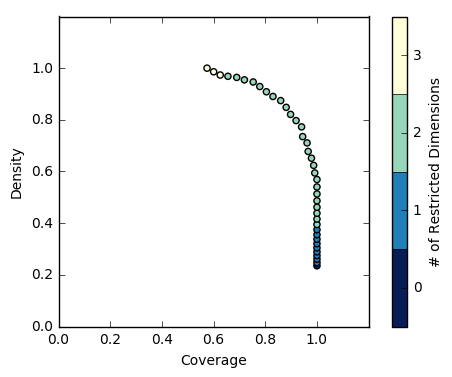

In [120]:
import prim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(np.random.rand(1000, 3), columns=["x1", "x2", "x3"])
response = df["x1"]*df["x2"] + 0.2*df["x3"]

p = prim.Prim(df, response, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [121]:
h={}
for i in range(10):
    h[i,i]="a"
    

In [122]:
h

{(0, 0): 'a',
 (1, 1): 'a',
 (2, 2): 'a',
 (3, 3): 'a',
 (4, 4): 'a',
 (5, 5): 'a',
 (6, 6): 'a',
 (7, 7): 'a',
 (8, 8): 'a',
 (9, 9): 'a'}

In [123]:
from collections import defaultdict

In [124]:
text="The first things that strikes him is the cost of using robots in the plantation. Alex questions their efficiency. Also, he understands how to deal with bottlenecks and that he should avoid releasing materials at a faster pace than the system can handle it. One solution is to keep a bit of inventory ( a supply ) in front of the bottlenecks so that he can be sure that the bottlenecks are not idle. Another aspect that Alex introduces to the plant is the statistical fluctuation concept: rather than trying to optimize performance on each station, Jonah believes in the “ dependent events ” and that there is a mathematical way to modelize the production and optimize the whole system together, and not isolated parts of the system. Indeed, Jonah develops a new scheduling that deals with the plant as a whole, to better manage cash flows and improve the response time to clients."

In [125]:
def wordcount(text,k):
    dic=defaultdict(int)
    for i in text.split():
        dic[i.lower()]=dic[i.lower()]+1
    return dic

In [126]:
wordcount(text,k)

defaultdict(int,
            {'(': 1,
             ')': 1,
             'a': 6,
             'alex': 2,
             'also,': 1,
             'and': 5,
             'another': 1,
             'are': 1,
             'as': 1,
             'aspect': 1,
             'at': 1,
             'avoid': 1,
             'be': 1,
             'believes': 1,
             'better': 1,
             'bit': 1,
             'bottlenecks': 3,
             'can': 2,
             'cash': 1,
             'clients.': 1,
             'concept:': 1,
             'cost': 1,
             'deal': 1,
             'deals': 1,
             'dependent': 1,
             'develops': 1,
             'each': 1,
             'efficiency.': 1,
             'events': 1,
             'faster': 1,
             'first': 1,
             'flows': 1,
             'fluctuation': 1,
             'front': 1,
             'handle': 1,
             'he': 3,
             'him': 1,
             'how': 1,
             'idle.': 1,
        

In [127]:
dic={}
dic["a"]=2
dic

{'a': 2}

In [128]:
from collections import Counter
counts=Counter(text.split())
sorted(counts,key=counts.get,reverse=True)



['the',
 'that',
 'to',
 'a',
 'and',
 'of',
 'is',
 'bottlenecks',
 'he',
 'in',
 'not',
 'Jonah',
 'can',
 'with',
 'optimize',
 'Alex',
 'than',
 'system',
 'plant',
 'handle',
 'whole,',
 'are',
 'trying',
 'sure',
 'together,',
 'supply',
 'be',
 'believes',
 'scheduling',
 'front',
 'Also,',
 'statistical',
 'fluctuation',
 'questions',
 'cost',
 'aspect',
 'parts',
 'should',
 'One',
 'releasing',
 'concept:',
 'clients.',
 'materials',
 'response',
 'robots',
 'deal',
 'system.',
 'manage',
 'time',
 'inventory',
 'pace',
 'first',
 'strikes',
 'events',
 'Indeed,',
 'faster',
 'there',
 'using',
 'production',
 'way',
 'The',
 'things',
 'so',
 'at',
 'station,',
 'on',
 'it.',
 'whole',
 'how',
 'dependent',
 'plantation.',
 'efficiency.',
 'idle.',
 'introduces',
 'develops',
 'as',
 'performance',
 ')',
 'isolated',
 'mathematical',
 'Another',
 'improve',
 'each',
 'solution',
 'keep',
 'avoid',
 '“',
 'flows',
 'deals',
 'cash',
 '”',
 'bit',
 'understands',
 'modelize',


In [129]:
int

int